In [15]:
import astropy.io.fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, hstack, Column

### This notebook is intended develop more catalog exploration skills and more
### advanced plotting! 

In [16]:
#replace the catalog path here with the path to your local path
path = '/Users/minathoresen/Desktop/JPL_summer_research/CH2O_CMZoom/'

### this is where you actually load in the catalog table
catalog = Table.read(path+'megacatalog_team_acc_final_say.fits')

In [17]:
### plot the list of catalog keys! Note that there are some new ones.
print(catalog.keys())

['index', 'area_ellipse', 'area_exact', 'flux_integrated', 'major_sigma', 'minor_sigma', 'position_angle', 'radius', 'glon', 'glat', 'r_eff', 'flux_integrated_bgsub', 'min_flux_integrated', 'noise', 'peak_cont_flux', 'min_cont_flux', 'mean_cont_flux', 'npix', 'DustTemperature', 'herschel_column', 'mass', 'sma_column', 'r_eff_pc', 'Sigma', 'n', 'rho', 'tff', 'glon_0', 'mass_bgsub', 'suspicious', 'leaf_ID', 'mask_num', 'mass_unc', 'N_unc', 'n_unc', 'rho_unc', 'tff_unc', 'mass_bgsub_unc', 'atoll_final_say', 'SF_final_say', '8um_point_hph', '20-24um_point_hph', '70um_point_hph', 'YSO_hph', 'Walsh+2014_h2o_maser_hph', 'Caswell+2012_methanol_maser_hph', 'Gutermuth+2015_24um_point_hph', 'Molinari+2016_70um_point_hph', 'SF_any_all_hph', 'SF_any_certain_hph', '8um_point_brian', '20-24um_point_brian', '70um_point_brian', 'YSO_brian', 'Walsh+2014_h2o_maser_brian', 'Caswell+2012_methanol_maser_brian', 'Gutermuth+2015_24um_point_brian', 'Molinari+2016_70um_point_brian', 'SF_any_all_brian', 'SF_any_

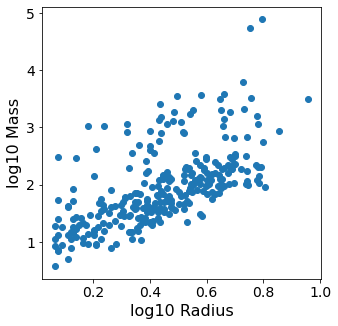

In [18]:
### OK lets do a standard plot! Try making a scatter plot of mass vs radius ['r_eff']
### for each source in the catalog, in log scale with nicely labeled axes etc.
masses = catalog['mass']
radius = catalog['r_eff']

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
ax.scatter(np.log10(radius), np.log10(masses))
plt.xlabel('log10 Radius', fontsize = 16)
plt.ylabel('log10 Mass', fontsize = 16)
# ax.set_xscale('log')
# ax.set_yscale('log')
#ax.set_xlim(1, 10)
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
#why isn't it changing my y axis tick size?

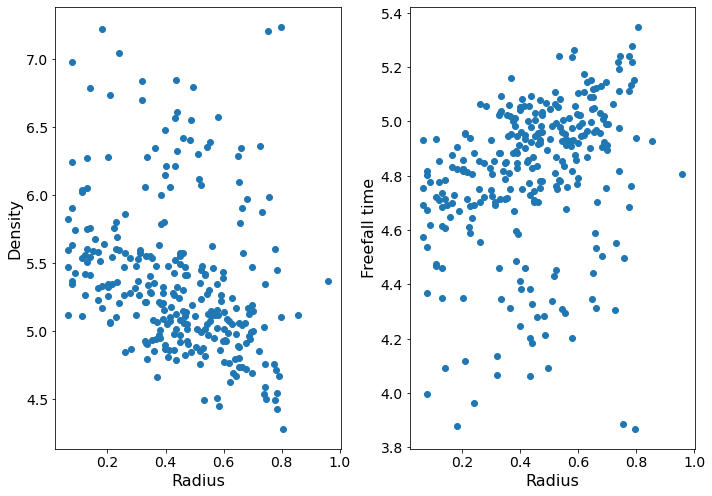

In [19]:
### Great! Now let's try making a couple more similar plots for some 
### of the other catalog properties. Try making two side-by-side scatter plots
### of Density (volume density, catalog['n']) vs radius and then also freefall time
### (catalog['tff']) vs radius.
density = catalog['n']
freefall_time = catalog['tff']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
ax = axes[0]
ax.scatter(np.log10(radius), np.log10(density))
# plt.xlabel('Radius', fontsize = 16)
# plt.ylabel('Density', fontsize = 16)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

#for ax in axes.flat:
ax.set_xlabel('Radius', fontsize=16)
ax.set_ylabel('Density', fontsize=16)

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

ax1 = axes[1]
ax1.scatter(np.log10(radius), np.log10(freefall_time))
# plt.xlabel('Radius', fontsize = 16)
# plt.ylabel('Freefall time', fontsize = 16)
#plt.show()
# ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.tick_params(axis='x',labelsize=14)
ax1.tick_params(axis='y',labelsize=14)

#for ax1 in axes.flat:
ax1.set_xlabel('Radius', fontsize=16)
ax1.set_ylabel('Freefall time', fontsize=16)

plt.tight_layout()
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

#where is my y-axis for the second plot?

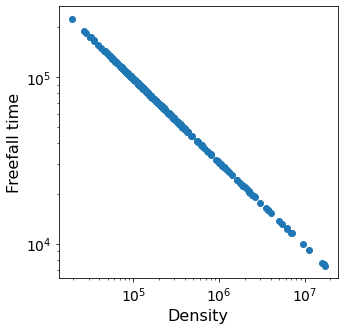

In [20]:
### do you notice anything about these plots? What happens when you make a plot of 
### density vs freefall time. Why do you think it looks like this? 
### Maybe something can explain it in the paper?
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5)) 
ax.scatter(density, freefall_time)
plt.xlabel('Density', fontsize = 16)
plt.ylabel('Freefall time', fontsize = 16)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)



        n         
     1 / cm3      
------------------
2.1010063541976405
 4.655275457551505
  3.44210953115188
 2.649334404865621
 4.180207979124018
 3.853622470914864
               ...
 2.414210508497067
 2.328383562469974
 4.680685783218808
2.5961046352607866
 2.526546211145085
 3.684452863305569
2.3337924595331723
Length = 285 rows


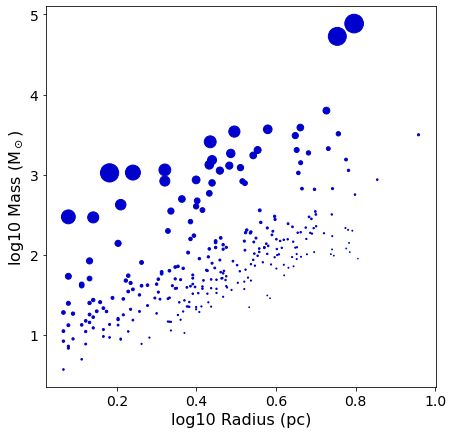

In [90]:
### More challenging one! 
### can you figure out how to make a plot of mass vs radius where the size of each 
### dot is scaled by its density?
density_scale = density/50000
print(density_scale)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7, 7))
ax.scatter(np.log10(radius), np.log10(masses), s = density_scale, c='mediumblue')
plt.xlabel('log10 Radius (pc)', fontsize = 16)
plt.ylabel('log10 Mass (M$_\odot$)', fontsize = 16)

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

In [22]:
### Even more challenging one! 
### Can you make a plot of mass vs radius where ONLY the star forming leaves are plotted
### in a different color (i.e. red) and maybe using a different shape like a star or a box? 
### the catalog key for star forming status is catalog['sf_final_say']
### where sf_final_say is 1, the leaf is star forming. Where it's 0 its quiescent
### where sf_final_say is 2, the leaf is ambiguously star forming (we can't tell for sure)



[ True  True  True  True False  True  True False  True False  True  True
  True  True  True False False False False False False False False False
 False False  True  True False False False False  True False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False False False False False  True False False
 False False False False False  True False  True  True False False False
 False False False False False False False False False False False False
 False  True False False False False False False False  True False False
  True False False False False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False  True  True False False Fa

NameError: name 'leaf' is not defined

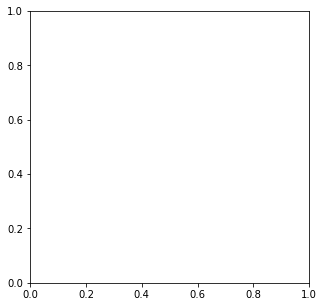

In [25]:
# for leaf in catalog['SF_final_say']:
#     if catalog['SF_final_say'] == '1'
#         print(leaf)
specific_condition1 = (catalog['SF_final_say'] == 1)
print(specific_condition1)
print(len(catalog['mass']))
#print(len(catalog['SF_final_say']))
print(len(specific_condition1))
print(len(catalog['mass'][specific_condition1]))

specific_condition0 = (catalog['SF_final_say'] == 0)
#print(catalog['SF_final_say'][specific_condition0])

specific_condition2 = (catalog['SF_final_say'] == 2)
#print(catalog['SF_final_say'][specific_condition2])


col =[]
for i in range(len(masses)):
    if catalog['SF_final_say'][i] == 1:
        col.append('red')
    elif catalog['SF_final_say'][i] == 0:
        col.append('blue')
    else:
        col.append('black')
    
       
# for leaf in catalog['SF_final_say']:
#     if [catalog['SF_final_say'] == '1'
#         col.append('blue')  
   
# for leaf in catalog['SF_final_say']:
#     if [catalog['SF_final_say'] == '1'
#         col.append('red')  
  

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
ax.scatter(np.log10(radius), np.log10(masses), c = col[leaf])
plt.xlabel('log10 Radius', fontsize = 16)
plt.ylabel('log10 Mass', fontsize = 16)

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)


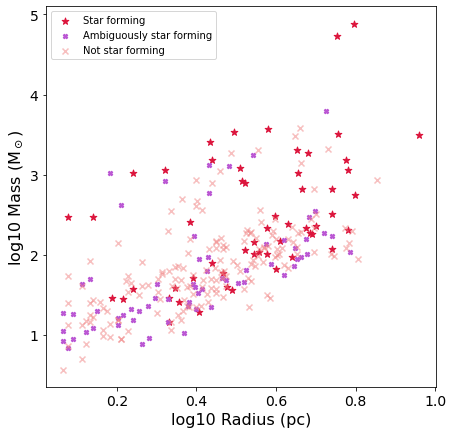

In [84]:
# for leaf in catalog['SF_final_say']:
#     if catalog['SF_final_say'] == '1'
#         print(leaf)
specific_condition1 = (catalog['SF_final_say'] == 1)

specific_condition0 = (catalog['SF_final_say'] == 0)

specific_condition2 = (catalog['SF_final_say'] == 2)

       

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
ax.scatter(np.log10(radius[specific_condition1]), np.log10(masses[specific_condition1]), 
           c='crimson', marker='*', s=50, label='Star forming')
ax.scatter(np.log10(radius[specific_condition2]), np.log10(masses[specific_condition2]), 
           c='mediumorchid', marker='X', s=20, label='Ambiguously star forming')
ax.scatter(np.log10(radius[specific_condition0]), np.log10(masses[specific_condition0]), 
           c='lightcoral', marker='x', label='Not star forming', alpha=0.5)

plt.xlabel('log10 Radius (pc)', fontsize = 16)
plt.ylabel('log10 Mass (M$_\odot$)', fontsize = 16)

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

ax.legend(loc='best')